300×4 DataFrame
│ Row │ s     │ fun   │ timeMean    │ std        │
│     │ Int64 │ Int64 │ Float64     │ Float64    │
├─────┼───────┼───────┼─────────────┼────────────┤
│ 1   │ 10    │ 1     │ 2.6e-7      │ 2.07364e-7 │
│ 2   │ 20    │ 1     │ 2.2e-7      │ 4.47214e-8 │
│ 3   │ 30    │ 1     │ 2.2e-7      │ 4.47214e-8 │
│ 4   │ 40    │ 1     │ 3.4e-7      │ 1.14018e-7 │
│ 5   │ 50    │ 1     │ 5.8e-7      │ 1.09545e-7 │
│ 6   │ 60    │ 1     │ 7.4e-7      │ 5.47723e-8 │
│ 7   │ 70    │ 1     │ 1.12e-6     │ 2.94958e-7 │
⋮
│ 293 │ 930   │ 3     │ 0.000744434 │ 2.21101e-5 │
│ 294 │ 940   │ 3     │ 0.000754594 │ 1.99716e-5 │
│ 295 │ 950   │ 3     │ 0.000789634 │ 3.757e-5   │
│ 296 │ 960   │ 3     │ 0.000818694 │ 3.30611e-5 │
│ 297 │ 970   │ 3     │ 0.000836274 │ 1.66957e-5 │
│ 298 │ 980   │ 3     │ 0.000842034 │ 1.0886e-5  │
│ 299 │ 990   │ 3     │ 0.000889593 │ 1.67066e-5 │
│ 300 │ 1000  │ 3     │ 0.000908513 │ 1.66642e-5 │

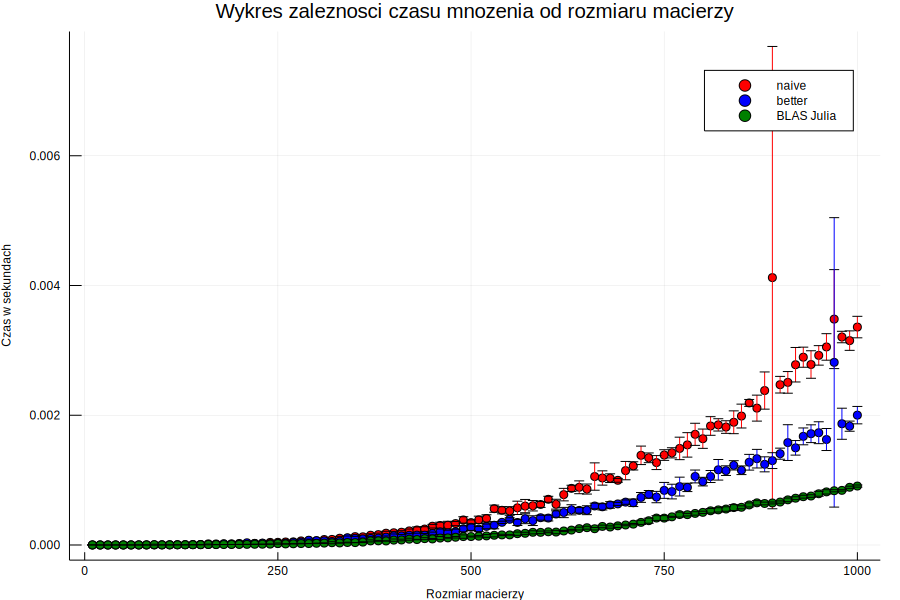

In [13]:
using DataFrames, Base, Statistics, Plots

function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

function time_fun()
a=Float64[]
    for i=1:3
        for j=1:100
            A=rand(1:1000,j,j)
            B=rand(1:1000,j,j)
            for k=1:5
                if i==1
                    push!(a, @elapsed naive_multiplication(A,B))
                elseif i==2
                    push!(a, @elapsed better_multiplication(A,B))
                else
                    push!(a, @elapsed A*B)
                end
            end
        end
    end
return a
end

df=DataFrame(s=repeat(10:10:1000, inner=5, outer=3), fun=repeat(1:3, inner=500), time=time_fun())

dataGrouped=by(df, [:s, :fun], timeMean = :time => mean, std = :time => std)

show(dataGrouped)

scatter(dataGrouped[:s], dataGrouped[:timeMean], group=dataGrouped[:fun],
     colour=[:red :blue :green], yerr=dataGrouped[:std],
     label=["naive","better","BLAS Julia"],
     size=(900,600),
     title="Wykres zaleznosci czasu mnozenia od rozmiaru macierzy",
     xaxis=("Rozmiar macierzy", font(8)), yaxis=("Czas w sekundach", font(8)))
